# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [8]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [9]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [ ]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
#check the uniqueness of the columns
for i in df.columns:
  print(i,":",df[i].unique())

School_Year : ['2015-2016' '2016-2017' '2017-2018' '2019-2020']
Busbreakdown_ID : [1224901 1225098 1215800 ... 1353044 1353045 1353046]
Run_Type : ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Bus_No : ['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
Route_Number : ['1' '2' 'P640' ... '012' '29AM' '1409B']
Reason : ['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
Schools_Serviced : ['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
Occurred_On : ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
Created_On : ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Busbreakdown_ID,147972.0,1.287779e+06,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Number_Of_Students_On_The_Bus,147972.0,3.590071e+00,55.365859,0.0,0.00,0.0,4.00,9007.0


In [ ]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
df[['Busbreakdown_ID','Number_Of_Students_On_The_Bus']].head()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
0,1224901,5
1,1225098,3
2,1215800,12
3,1215511,11
4,1215828,12


In [ ]:
df.shape

(147972, 21)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [10]:
df[['Run_Type','Route_Number','Reason','Boro','How_Long_Delayed','Incident_Number']].isnull().sum()

,0
Run_Type,15
Route_Number,23
Reason,27
Boro,1138
How_Long_Delayed,5015
Incident_Number,31171


In [ ]:
'''
after chek of the null values in run_type and reseson we will drop the null because is small  in Route_Number in deffrein
city is not important and not effective in our goal prediction so we will drop it too,we will drop Incident_Number
columns because almost have null values and Busbreakdown_ID we will drop it too.
'''
df[['Run_Type','Route_Number','Reason','Boro','How_Long_Delayed','Incident_Number']].sample(100)

,Run_Type,Route_Number,Reason,Boro,How_Long_Delayed,Incident_Number
24427,Special Ed AM Run,K029,Weather Conditions,Brooklyn,90 MIN,NaN
5962,Special Ed AM Run,X577,Heavy Traffic,Bronx,15 mins,NaN
100896,Special Ed PM Run,M125,Accident,Manhattan,0,NaN
33028,Special Ed PM Run,X115,Late return from Field Trip,Bronx,15-20 MIN,NaN
25765,Pre-K/EI,ME-1,Heavy Traffic,Bronx,20 MIN,NaN
...,...,...,...,...,...,...
86468,General Ed AM Run,M1288,Won`t Start,Manhattan,30-45 min,NaN
78163,General Ed AM Run,X2103,Other,Bronx,NaN,NaN
88962,Special Ed AM Run,L937,Other,NaN,20 mins,NaN
89759,Special Ed AM Run,Q817,Heavy Traffic,Queens,30 mins,NaN


In [11]:
drop_columns = ['Number_Of_Students_On_The_Bus','Busbreakdown_ID','Run_Type','Route_Number','Reason','Boro','How_Long_Delayed','Incident_Number','School_Year','Bus_Company_Name','Schools_Serviced','Bus_No']
df.drop(columns=drop_columns,inplace=True)

In [12]:
df.isnull().sum()

,0
Occurred_On,1
Created_On,1
Has_Contractor_Notified_Schools,1
Has_Contractor_Notified_Parents,1
Have_You_Alerted_OPT,1
Informed_On,1
Last_Updated_On,1
Breakdown_or_Running_Late,1
School_Age_or_PreK,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Bus_No                           147972 non-null  object
 1   Schools_Serviced                 147972 non-null  object
 2   Occurred_On                      147972 non-null  object
 3   Created_On                       147972 non-null  object
 4   Bus_Company_Name                 147972 non-null  object
 5   Number_Of_Students_On_The_Bus    147972 non-null  int64 
 6   Has_Contractor_Notified_Schools  147972 non-null  object
 7   Has_Contractor_Notified_Parents  147972 non-null  object
 8   Have_You_Alerted_OPT             147972 non-null  object
 9   Informed_On                      147972 non-null  object
 10  Last_Updated_On                  147972 non-null  object
 11  Breakdown_or_Running_Late        147972 non-null  object
 12  School_Age_or_Pr

In [ ]:
df['Breakdown_or_Running_Late'].unique()


array(['Running Late', 'Breakdown'], dtype=object)

In [ ]:

df.head()

,Occurred_On,Created_On,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
for i in df.columns:
  print(i,":",df[i].unique())

Occurred_On : ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
Created_On : ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '05/25/2017 04:28:00 PM'
 '05/25/2017 04:30:00 PM' '05/25/2017 04:37:00 PM']
Has_Contractor_Notified_Schools : ['Yes' 'No']
Has_Contractor_Notified_Parents : ['Yes' 'No']
Have_You_Alerted_OPT : ['No' 'Yes']
Informed_On : ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '05/25/2017 04:28:00 PM'
 '05/25/2017 04:30:00 PM' '05/25/2017 04:37:00 PM']
Last_Updated_On : ['10/26/2015 08:40:39 AM' '10/27/2015 07:11:22 AM'
 '09/18/2015 07:38:44 AM' ... '05/25/2017 04:34:36 PM'
 '05/25/2017 04:30:07 PM' '05/25/2017 04:37:37 PM']
Breakdown_or_Running_Late : ['Running Late' 'Breakdown']
School_Age_or_PreK : ['Pre-K' 'School-Age']


In [14]:
df_c = df.copy()

In [15]:
df_c.head()

,Occurred_On,Created_On,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [16]:
scale = LabelEncoder()
df_c['Breakdown_or_Running_Late'] = scale.fit_transform(df_c['Breakdown_or_Running_Late'])
df_c['Occurred_On'] = scale.fit_transform(df_c['Occurred_On'])
df_c['Created_On'] = scale.fit_transform(df_c['Created_On'])
df_c['Has_Contractor_Notified_Schools'] = scale.fit_transform(df_c['Has_Contractor_Notified_Schools'])
df_c['Has_Contractor_Notified_Parents'] = scale.fit_transform(df_c['Has_Contractor_Notified_Parents'])
df_c['Have_You_Alerted_OPT'] = scale.fit_transform(df_c['Have_You_Alerted_OPT'])
df_c['Informed_On'] = scale.fit_transform(df_c['Informed_On'])
df_c['Last_Updated_On'] = scale.fit_transform(df_c['Last_Updated_On'])
df_c['Breakdown_or_Running_Late'] = scale.fit_transform(df_c['Breakdown_or_Running_Late'])
df_c['School_Age_or_PreK'] = scale.fit_transform(df_c['School_Age_or_PreK'])

In [ ]:
df_c.head()

,Occurred_On,Created_On,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,56392,61017,1,1,0,61017,116763,1,0
1,56698,61329,1,1,0,61329,117361,1,0
2,48207,51829,1,1,1,51829,98486,1,0
3,48064,51656,1,1,1,51656,98208,1,0
4,48210,51836,1,1,0,51836,98548,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [17]:
X = df_c.drop(columns=['Breakdown_or_Running_Late'])
y = df_c['Breakdown_or_Running_Late']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [19]:
X_train.shape

(25315, 8)

In [20]:
#bulding ann model
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [21]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [23]:
#train the model
histor = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8415 - loss: 59.3644 - val_accuracy: 0.8921 - val_loss: 0.3993
Epoch 2/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8932 - loss: 0.4073 - val_accuracy: 0.8938 - val_loss: 0.3588
Epoch 3/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8923 - loss: 0.3698 - val_accuracy: 0.8941 - val_loss: 0.3454
Epoch 4/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8943 - loss: 0.3516 - val_accuracy: 0.8940 - val_loss: 0.3475
Epoch 5/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8947 - loss: 0.3409 - val_accuracy: 0.8938 - val_loss: 0.3433
Epoch 6/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.3363 - val_accuracy: 0.8938 - val_loss: 0.3432
Epoch 7/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8912 - loss: 0.3474 - val_accuracy: 0.8938 - val_loss: 0.3412
Epoch 8/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8935 - loss: 0.3419 - val_accuracy: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [24]:
#evaluate the model
loss,accuracy = model.evaluate(X_test,y_test)
print("loss:",loss,'/n','accuracy:',accuracy)

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8983 - loss: 0.3293
loss: 0.34101736545562744 /n accuracy: 0.8938220739364624


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [25]:
#make predictions
y_pred = model.predict(X_test)
y_pred

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.8948179],
       [0.8948179],
       [0.8948179],
       ...,
       [0.8948179],
       [0.8948179],
       [0.8948179]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

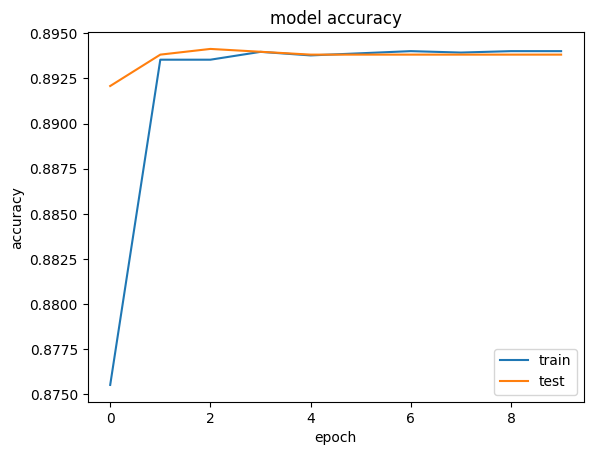

In [26]:
#model performance visualization
plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

## Save the Model
Save the trained model for submission.

In [27]:
#Saving the model
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
Like i mentioned above there is a lot an necessary columns that can not affect to predict the bus late or not
like number of student in the bus and a lot of columns to be clear the important columns is the time that come with data that is give as our goal of predictions
and in genral i use labelencoder because i have category values
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
deponding in number of my feature

3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: